<a href="https://colab.research.google.com/github/Shirley22225/netflix_shows/blob/main/Netflix_shows_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Authorize Google Drive access**

In [1]:
#mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 2: Load the Dataset**

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Datasets/netflix_titles.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded correctly
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Step 3: Explore the Dataset**

In [ ]:
# Check the column names in the DataFrame
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [ ]:
# Check for null values in the dataset
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
# Check the format of the duration
print("Unique Movie Durations:", df[df['type'] == 'Movie']['duration'].unique())
print("Unique TV Show Durations:", df[df['type'] == 'TV Show']['duration'].unique())

Unique Movie Durations: ['90 min' '91 min' '125 min' '104 min' '127 min' '67 min' '94 min'
 '161 min' '61 min' '166 min' '147 min' '103 min' '97 min' '106 min'
 '111 min' '110 min' '105 min' '96 min' '124 min' '116 min' '98 min'
 '23 min' '115 min' '122 min' '99 min' '88 min' '100 min' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '64 min' '59 min' '139 min' '69 min' '148 min' '189 min'
 '141 min' '130 min' '138 min' '81 min' '132 min' '123 min' '65 min'
 '68 min' '66 min' '62 min' '74 min' '131 min' '39 min' '46 min' '38 min'
 '126 min' '155 min' '159 min' '137 min' '12 min' '273 min' '36 min'
 '34

In [ ]:
# Check the format of the date_added column
print("Unique Date Formats:", df['date_added'].unique())

Unique Date Formats: ['September 25, 2021' 'September 24, 2021' 'September 23, 2021' ...
 'December 6, 2018' 'March 9, 2016' 'January 11, 2020']


**Step 4: Data Cleaning and Preparation**

In [ ]:
# Drop irrelevant columns
df.drop(['show_id', 'description'], axis=1, inplace=True)
print(df.columns)  # Check the modified column names

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')


In [ ]:
# Convert duration to numeric (in minutes) for movies
df.loc[df['type'] == 'Movie', 'duration'] = df.loc[df['type'] == 'Movie', 'duration'].str.replace(' min', '').astype(float)
print(df.head())  # Check the DataFrame after converting duration to numeric

      type                  title         director  \
0    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1  TV Show          Blood & Water              NaN   
2  TV Show              Ganglands  Julien Leclercq   
3  TV Show  Jailbirds New Orleans              NaN   
4  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13       90.0   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 202

In [ ]:
#Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'])
print(df.head())  # Check the DataFrame after converting date_added to datetime

      type                  title         director  \
0    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1  TV Show          Blood & Water              NaN   
2  TV Show              Ganglands  Julien Leclercq   
3  TV Show  Jailbirds New Orleans              NaN   
4  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13       90.0   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-0

In [ ]:
# Fill missing values in the 'country' column with 'Unknown'
df['country'].fillna('Unknown', inplace=True)
print(df.head())  # Check the DataFrame after filling missing values in the 'country' column

      type                  title         director  \
0    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1  TV Show          Blood & Water              NaN   
2  TV Show              Ganglands  Julien Leclercq   
3  TV Show  Jailbirds New Orleans              NaN   
4  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                                NaN        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13       90.0   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-0

In [ ]:
# Remove TV Show durations and remain with only movie durations
df.loc[df['type'] == 'TV Show', 'duration'] = df.loc[df['type'] == 'TV Show', 'duration'].str.extract('(\d+)').astype(float)
print(df.head())  # Check the DataFrame after removing TV Show durations

      type                  title         director  \
0    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1  TV Show          Blood & Water              NaN   
2  TV Show              Ganglands  Julien Leclercq   
3  TV Show  Jailbirds New Orleans              NaN   
4  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                                NaN        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating duration  \
0 2021-09-25          2020  PG-13     90.0   
1 2021-09-24          2021  TV-MA      NaN   
2 2021-09-24          2021  TV-MA      NaN   
3 2021-09-24          2021  TV-MA      NaN   
4 2021-09-24      

**Step 5: Data Analysis and Visualization**

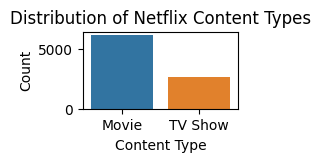

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chart 1: Bar chart for content type distribution
content_counts = df['type'].value_counts()
plt.figure(figsize=(2, 1))
sns.barplot(x=content_counts.index, y=content_counts.values)
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('Distribution of Netflix Content Types')
plt.show()

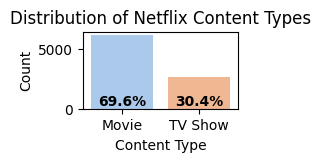

In [ ]:
# Calculate the percentage of each content type
content_type_counts = df['type'].value_counts(normalize=True) * 100

# Plot the distribution of content types with percentages
plt.figure(figsize=(2, 1))
sns.countplot(x='type', data=df, palette='pastel')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('Distribution of Netflix Content Types')

# Annotate the bars with percentages
for index, value in enumerate(content_type_counts):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom', fontweight='bold', color='black')

plt.show()

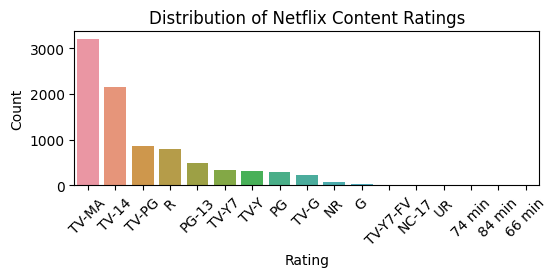

In [ ]:
# Chart 2: Distribution of Content Ratings
plt.figure(figsize=(6, 2))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Netflix Content Ratings')
plt.show()

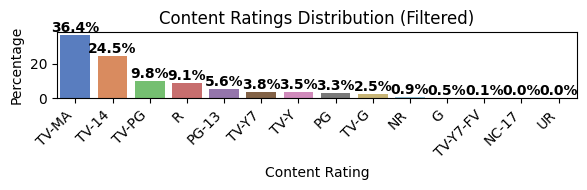

In [ ]:
# Set a threshold for excluding the last 3 content ratings
threshold = 3

# Filter the data to exclude content ratings with occurrences below the threshold
filtered_ratings = df['rating'].value_counts()
filtered_ratings = filtered_ratings[filtered_ratings >= threshold]

# Calculate the percentage of each content rating after filtering
content_rating_counts = (filtered_ratings / len(df)) * 100

# Plot the distribution of content ratings with percentages after filtering
plt.figure(figsize=(6, 2))
sns.barplot(x=content_rating_counts.index, y=content_rating_counts, palette='muted', order=content_rating_counts.index)
plt.xlabel('Content Rating')
plt.ylabel('Percentage')
plt.title('Content Ratings Distribution (Filtered)')

# Annotate the bars with percentages
for index, value in enumerate(content_rating_counts):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom', fontweight='bold', color='black')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-40-099d0036afea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['rating_order'] = movie_data['rating'].map(rating_order)


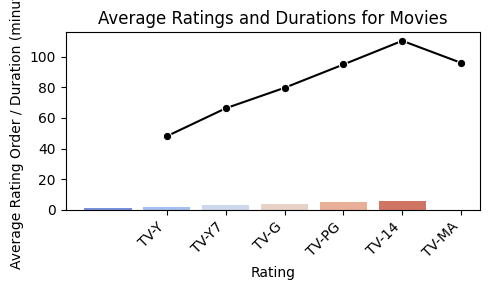

In [ ]:
# Chart 3: Ratings and Durations for Movies

# Filter the data to include only movies
movie_data = df[df['type'] == 'Movie']

# Map ratings to numerical values for better sorting on the x-axis
rating_order = {'TV-Y': 1, 'TV-Y7': 2, 'TV-G': 3, 'TV-PG': 4, 'TV-14': 5, 'TV-MA': 6}
movie_data['rating_order'] = movie_data['rating'].map(rating_order)

# Calculate the average rating and duration for each rating category
average_ratings = movie_data.groupby('rating_order')['rating_order'].mean()
average_durations = movie_data.groupby('rating_order')['duration'].mean()

# Create a bar chart to plot the average ratings and durations
plt.figure(figsize=(5, 3))

sns.barplot(x=average_ratings.index, y=average_ratings, palette='coolwarm')
sns.lineplot(x=average_durations.index, y=average_durations, color='black', marker='o')

plt.xlabel('Rating')
plt.ylabel('Average Rating Order / Duration (minutes)')
plt.title('Average Ratings and Durations for Movies')
plt.xticks(ticks=average_ratings.index, labels=rating_order.keys(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

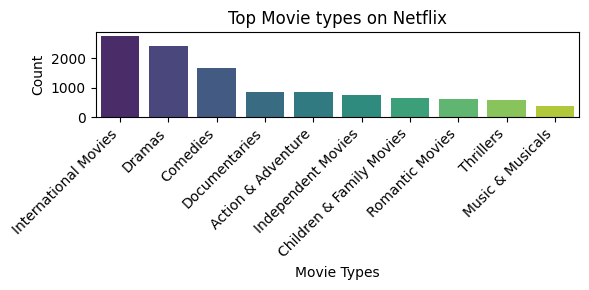

In [ ]:
# # Chart 4: Top movie types on Netflix
plt.figure(figsize=(6, 3))
top_movie_types = df[df['type'] == 'Movie']['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)
sns.barplot(x=top_movie_types.index, y=top_movie_types, palette='viridis')
plt.xlabel('Movie Types')
plt.ylabel('Count')
plt.title('Top Movie types on Netflix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

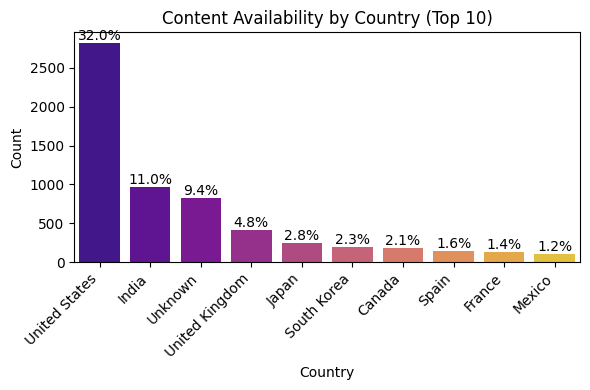

In [ ]:
# Chart 5: Top countries with the most Netflix content
plt.figure(figsize=(6, 4))
top_countries = df['country'].value_counts().head(10)
ax = sns.barplot(x=top_countries.index, y=top_countries, palette='plasma')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Content Availability by Country (Top 10)')
plt.xticks(rotation=45, ha='right')

# Add percentages inside the bars
for index, value in enumerate(top_countries):
    ax.text(index, value, f'{(value / len(df["country"]) * 100):.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

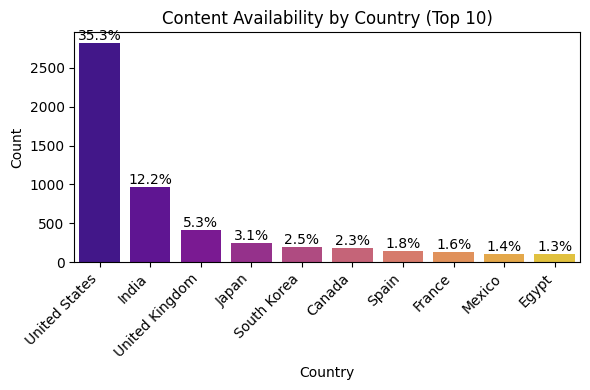

In [ ]:
# Filter out the 'Unknown' country from the dataset
df_filtered = df[df['country'] != 'Unknown']

# Plot the top countries with the most Netflix content
plt.figure(figsize=(6, 4))
top_countries = df_filtered['country'].value_counts().head(10)
ax = sns.barplot(x=top_countries.index, y=top_countries, palette='plasma')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Content Availability by Country (Top 10)')
plt.xticks(rotation=45, ha='right')

# Add percentages inside the bars
for index, value in enumerate(top_countries):
    ax.text(index, value, f'{(value / len(df_filtered["country"]) * 100):.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

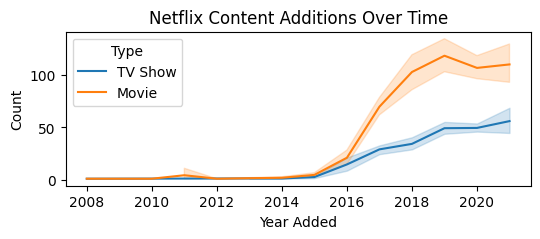

In [ ]:
# Chart 6: Number of Movies and TV Shows Released Over Time
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

content_additions = df.groupby(['year_added', 'month_added', 'type']).size().reset_index(name='count')
plt.figure(figsize=(6, 2))
sns.lineplot(x='year_added', y='count', hue='type', data=content_additions)
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.title('Netflix Content Additions Over Time')
plt.legend(title='Type')
plt.show()